<font color='seagreen'>


# Week 2 -- Vertical Structure of an Atmosphere
*Please finish and submit this project before the start of class on 13 September 2017.*

This week, we will play with the vertical structure of atmospheres, from both theoretical and observational perspectives. We'll also introduce some of the useful tools (like unit conversions!) included in the community-developed [astropy](http://docs.astropy.org/en/stable/index.html) Python library.

In [59]:
# gain access to numerical tools
import numpy as np

# gain access to plotting tools 
import matplotlib.pyplot as plt 
import seaborn as sns
# set up bigger default plots
# plt.matplotlib.rcParams['figure.figsize'] = (10,7)
# plt.matplotlib.rcParams['font.size'] = 12
sns.set_context('talk')
sns.set_style('darkgrid')
# make plots show up in the notebook
%matplotlib inline

<font color='seagreen'>

### Q1: Atmospheric Scale Heights

Calculate the scale height of Jupiter's atmosphere, assuming a temperature of 130K, a composition of 85% molecular hydrogen and 15% helium. Use the [`constants`](http://docs.astropy.org/en/stable/constants/index.html) and [`units`](http://docs.astropy.org/en/stable/units/index.html) packages from the community [`astropy`](http://docs.astropy.org/en/stable/index.html) Python library to access the physical constants you need and to handle your unit conversions. *Hint: Jupiter is 1.0 Jupiter radii, and 1.0 Jupiter masses.*

In [223]:
# import the constants and units packages from astropy
from astropy import constants, units

# this gives us access to useful constants and units
def calc_surface_grav(mass, radius, grav_constant):
    return (grav_constant*mass/(radius**2.0)).to(units.m/(units.s**2))

def get_scale_height_pressure(k_B, temp, mean_mol_mass, surface_grav):
    return k_B*temp/(mean_mol_mass*surface_grav)

jup_mean_mol_mass = ((0.85*2.0*1.0079 + 0.15*4.003)/(1000.0*constants.N_A))*units.kg/units.mol
jup_surface_g = calc_surface_grav(constants.M_jup, constants.R_jup, constants.G)
jup_scale_height = get_scale_height_pressure(constants.k_B, 130.0*units.K, jup_mean_mol_mass, jup_surface_g)
print_str = 'The scale height of Jupiter is: ' + str(jup_scale_height.to(units.km))
print(print_str)


The scale height of Jupiter is: 18.84607927817897 km


In [224]:
# define some variables, with units!
temperature = 130*units.K
k_B = constants.k_B
kT = k_B*temperature


<font color='seagreen'>
### Q2: Vertical Profiles of Solar System Planets

The plain-text data tables located in `verticalprofiles/` contain values for $P$, $T$, $\rho$, and $z$ along vertical traces through the atmospheres of Venus, Earth, Mars, Jupiter, and Titan. Look at the format of those files and check out the `README`. Then, please do the following steps ***for every vertical profile***.

+ Read in the table so that you have access to $P$, $T$, $\rho$, $z$ as arrays in Python.
+ Make a multipanel plot where pressure is the vertical coordinate on every panel, and the scale of the vertical axis is logarithmic. On the horizontal axes, please plot the following quantities (if they are not in the table, you will need to calculate them from the variables you do have).

    1. altitude 
    2. temperature
    3. density
    4. the lapse rate $dT/dz$
    5. the rate of change of pressure $dP/dz$
    6. the mean molecular weight
    
    
+ Calculate the dry adiabatic lapse rate. Based on these calculations, at what altitudes/pressures do expect convection is occuring? 
+ Discuss (at least) one interesting feature you see in each atmospheres. 

*The next five cells give you a few tips to get started.*

In [62]:
# For reading tables, I like the flexibility of astropy's table tools, ...
from astropy.io import ascii
def read_planet(fname):
    f_string = 'verticalprofiles/' + fname
    table = ascii.read(f_string)
    p = table['pressure']*units.bar
    T = table['temperature']*units.K
    rho = table['density']*units.kg/(units.m**3.0)
    z = table['altitude']*units.km

    p_plot2 = [(p[i+1] + p[i])/2.0 for i in range(0, len(p)-1)]
    p_plot2 = np.array([a.value for a in p_plot2])*units.bar
    dT_dz_arr = [(T[i+1] - T[i])/(z[i+1] - z[i]) for i in range(0, len(T)-1)]
    dT_dz_arr = np.array([a.value for a in dT_dz_arr])*units.K/units.km
    dp_dz_arr = [(p[i+1] - p[i])/(z[i+1] - z[i]) for i in range(0, len(T)-1)]
    dp_dz_arr = np.array([a.value for a in dp_dz_arr])*units.bar/units.km
    mean_mol_weight_arr = ((rho*constants.k_B*T/(p)).to(units.kg)/constants.m_p)*units.g/units.mol
    return [p, T, rho, z, p_plot2, dT_dz_arr, dp_dz_arr, mean_mol_weight_arr]

In [63]:
# For making multipanel plots, you can...
# ...create a grid of "axes" objects into which you will place your plot
def plot_planet(planet_title, planet_arrays, dry_lapse, moist_lapse):
    fi, ax = plt.subplots(1,6,sharey=True, figsize=(30, 10))
    [p, T, rho, z, p_plot2, dT_dz_arr, dp_dz_arr, mean_mol_weight_arr] = planet_arrays
    # set current axis to the first of those
    planet_title = planet_title + ' Vertical Profiles'
    fi.suptitle(planet_title, fontsize=30)
    plt.sca(ax[0])
    plt.title('Altitude')
    plt.plot(z, p, '-')
    plt.ylabel(r'Pressure [bar]')
    plt.xlabel(r'$z$ [km]')

    plt.sca(ax[1])
    plt.title('Temperature')
    plt.plot(T, p, '-')
    plt.xlabel(r'$T$ [K]')
    
    plt.sca(ax[2])
    plt.title('Density')
    plt.plot(rho, p, '-')
    plt.xlabel(r'$\rho$ [kg m$^{-3}$]')

    plt.sca(ax[3])
    plt.plot(dT_dz_arr, p_plot2 , '-')
    plt.plot([dry_lapse.value]*len(p_plot2), p_plot2, '--', label='Dry Lapse Rate')
    plt.plot([moist_lapse.value]*len(p_plot2), p_plot2, ':', label='Moist Lapse Rate')
    plt.xlabel(r'$\frac{dT}{dz}$ [K km$^{-1}$]')
    plt.title('Lapse Rate')
    ax[3].legend(loc='lower center', bbox_to_anchor=(0.5,-0.2))

    plt.sca(ax[4])
    plt.plot(dp_dz_arr, p_plot2, '-')
    plt.xlabel(r'$\frac{dP}{dz}$ [bar km$^{-1}$]')
    plt.title(r'$\frac{dP}{dz}$')

    plt.sca(ax[5])
    plt.plot(mean_mol_weight_arr, p, '-')
    plt.xlabel(r'$\mu$ [g mol$^{-1}$]')
    plt.title('Mean Molecular Weight')
    
    for axis in ax:
        axis.set_yscale('log')


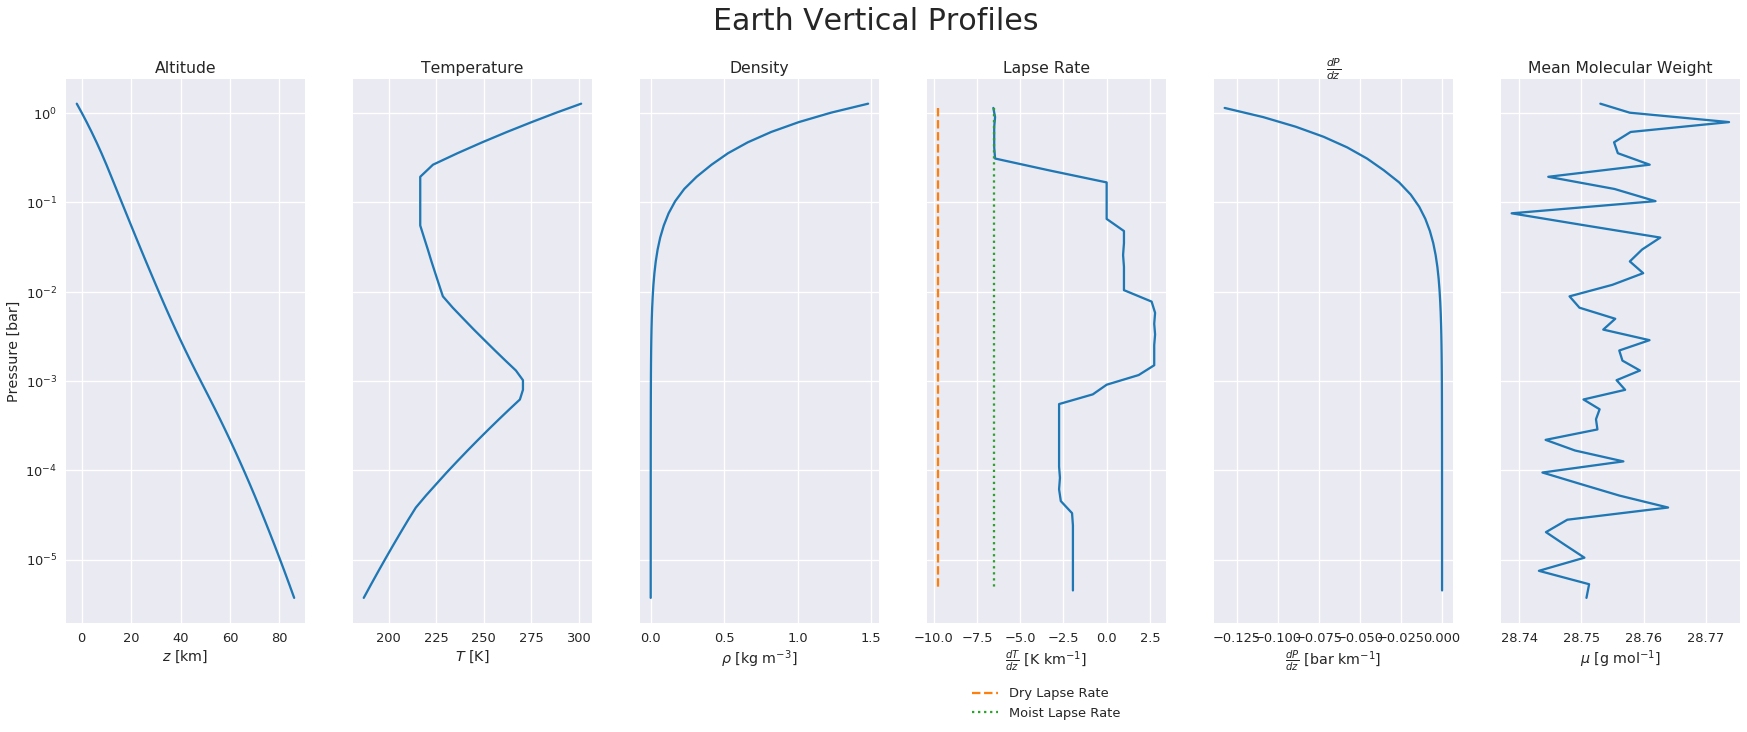

In [64]:
# If you have to do the same thing over again with different inputs,
# defining a function might be a helpful trick!

def get_lapse(surf_g, c_p):
    return (-surf_g/c_p).to(units.K/units.km)
    
def one_planet(fname, planet_title, dry_lapse, moist_lapse):
    planet_params = read_planet(fname)
    plot_planet(planet_title, planet_params, dry_lapse, moist_lapse)
    return planet_params

earth_surf_g = constants.g0
earth_cp = 1004.0*units.J/(units.K*units.kg)
earth_dry = get_lapse(earth_surf_g, earth_cp)
earth_moist = -6.5*(units.K/units.km)
earth_params = one_planet('earth.txt', 'Earth', earth_dry, earth_moist)
       

Stuff about Earth

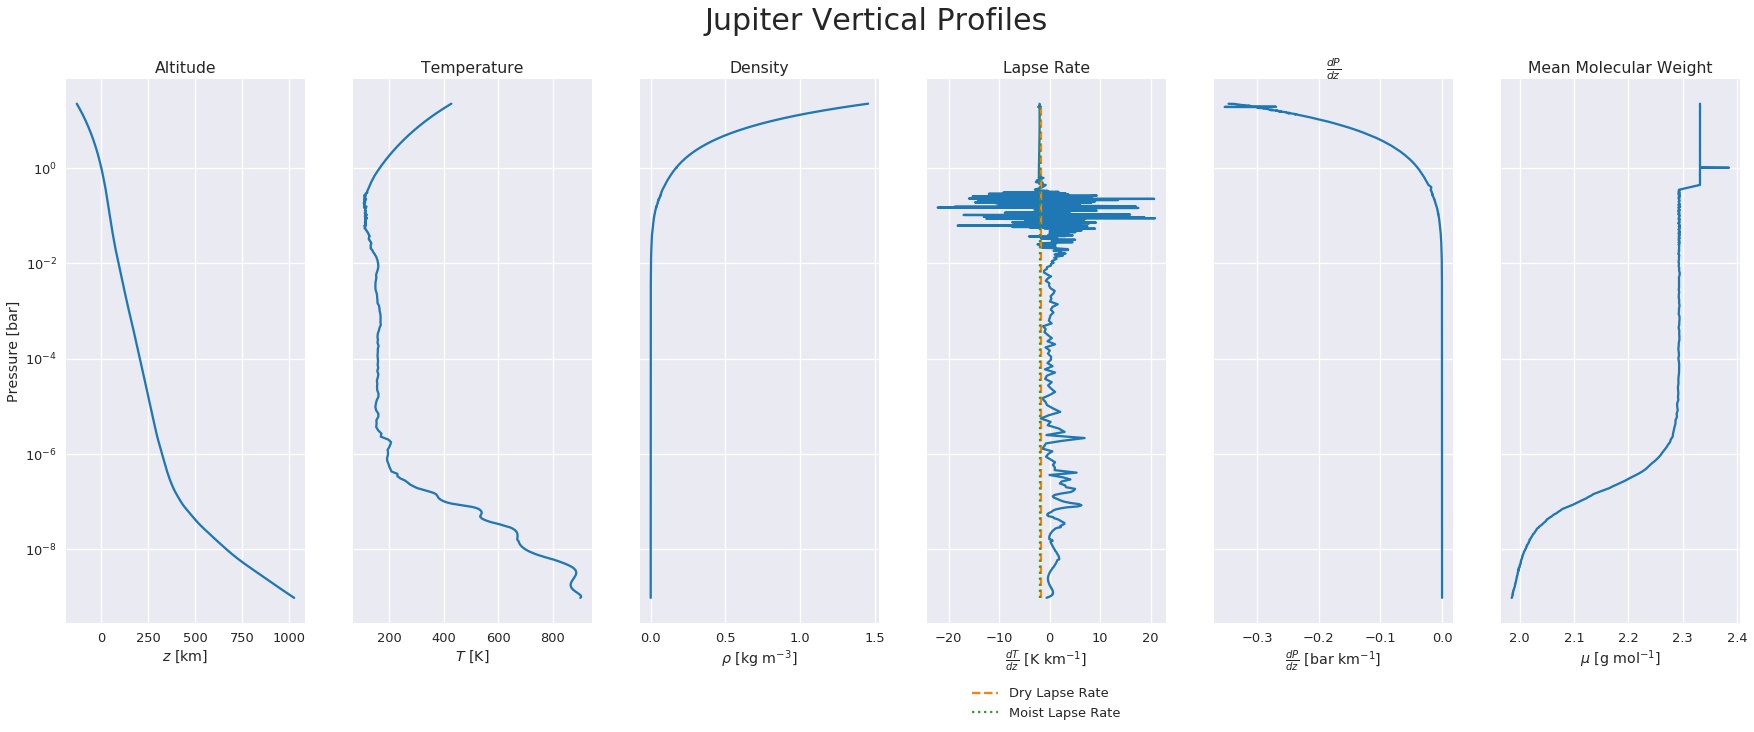

In [65]:
jup_cp = 14230.0*units.J/(units.K*units.kg)
jup_dry = get_lapse(jup_surface_g, jup_cp)
jup_moist = -1.9*(units.K/units.km)
jup_params = one_planet('jupiter.txt', 'Jupiter', jup_dry, jup_moist)

Stuff about Jupiter

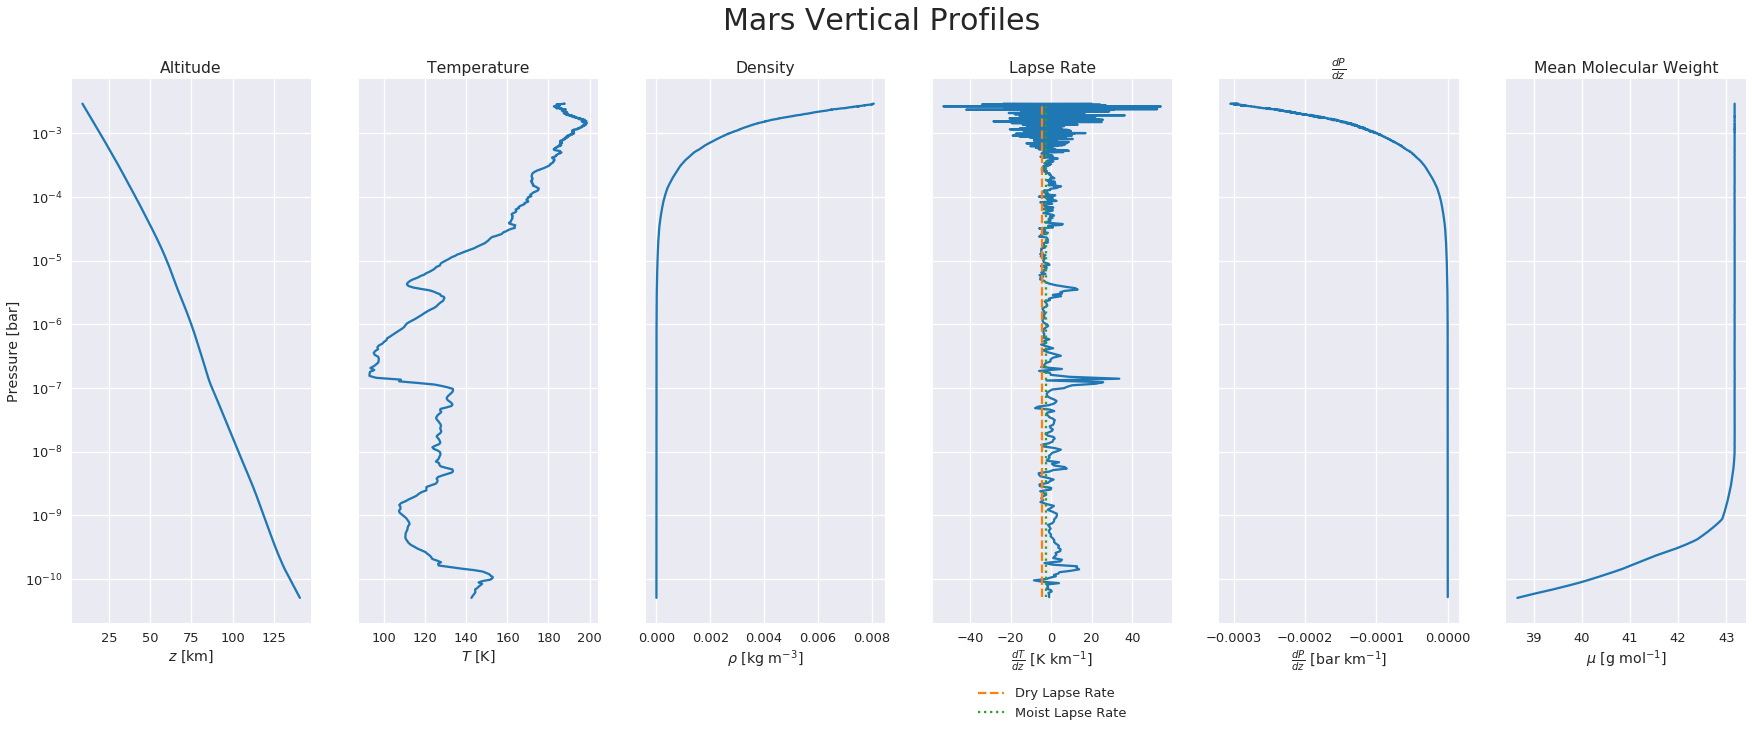

In [66]:
mars_surf_g = calc_surface_grav(0.11*constants.M_earth, 0.53*constants.R_earth, constants.G)
mars_cp = 820.0*units.J/(units.K*units.kg)
mars_dry = get_lapse(mars_surf_g, mars_cp)
mars_moist = -2.5*(units.K/units.km)
mars_params = one_planet('mars.txt', 'Mars', mars_dry, mars_moist)

Stuff about Mars

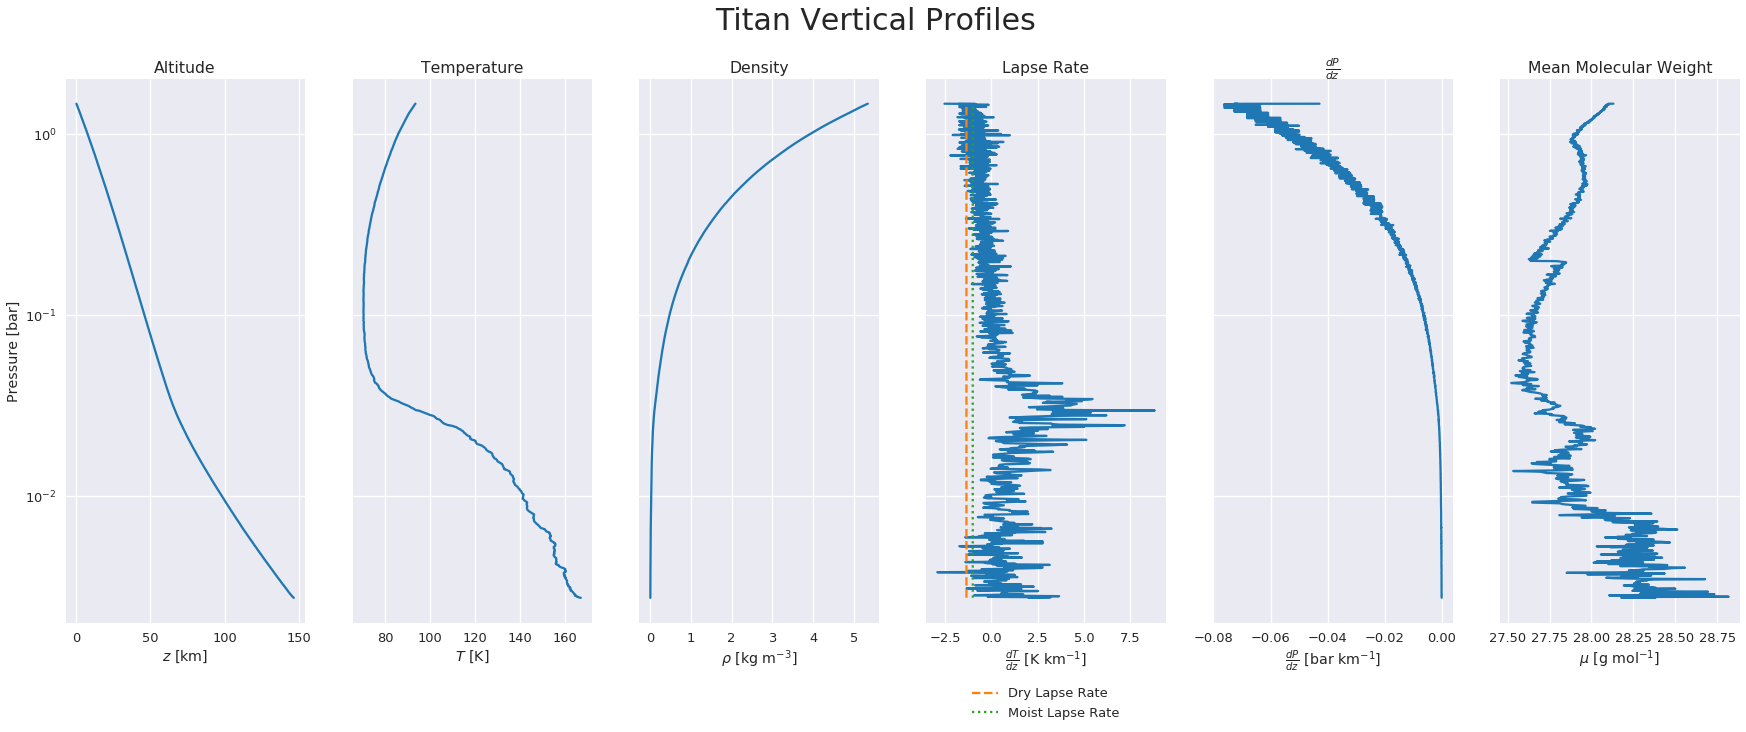

In [67]:
titan_surf_g = calc_surface_grav(0.023*constants.M_earth, 0.76*0.53*constants.R_earth, constants.G)
titan_cp = 1037.0*units.J/(units.K*units.kg)
titan_dry = get_lapse(titan_surf_g, titan_cp)
titan_moist = -1.0*(units.K/units.km)
titan_params = one_planet('titan.txt', 'Titan', titan_dry, titan_moist)

Stuff about Titan

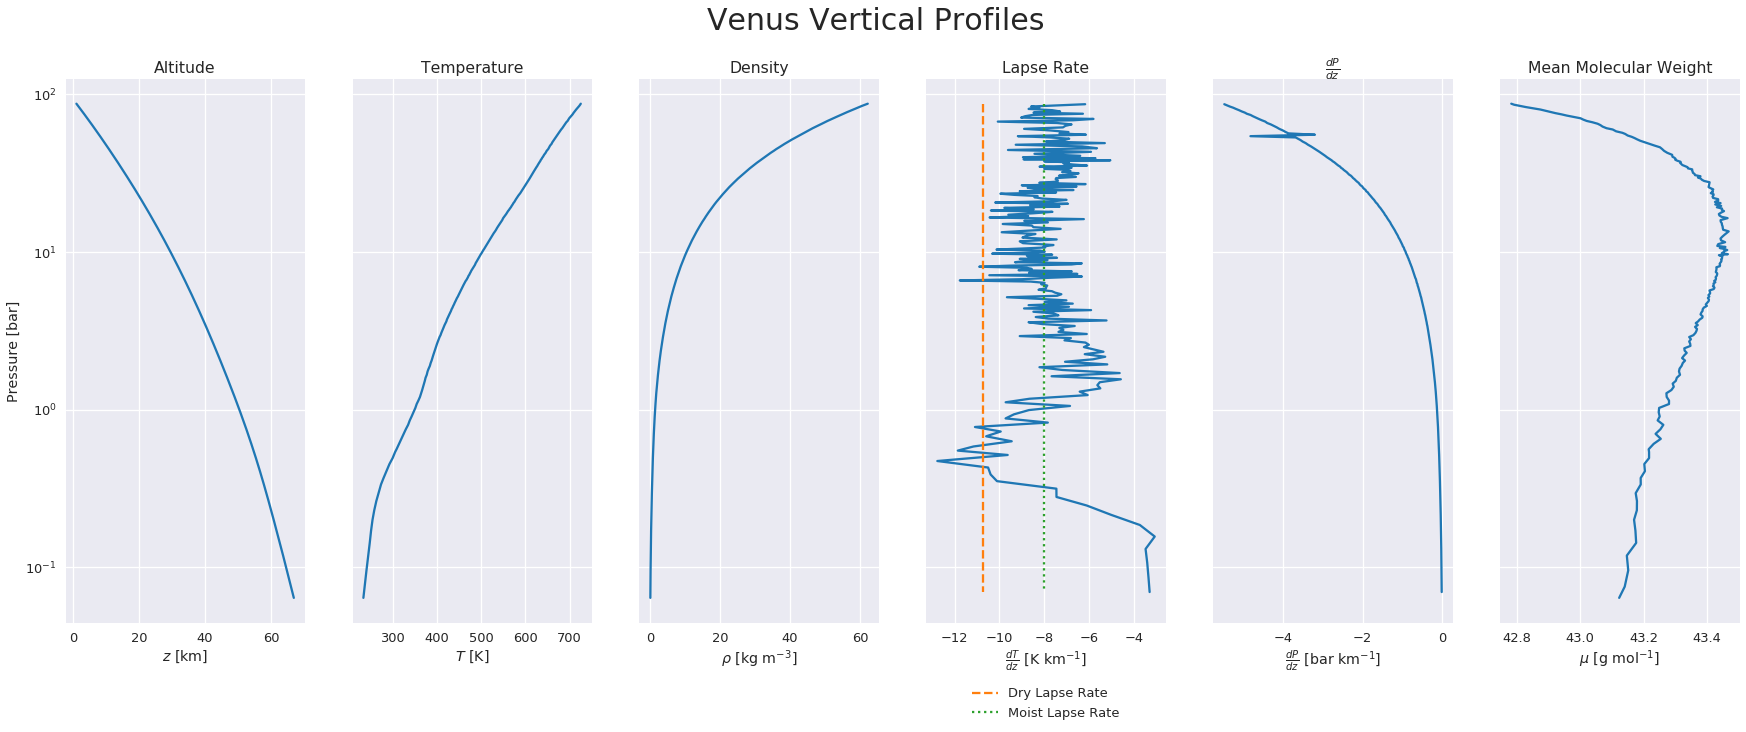

In [68]:
venus_surf_g = calc_surface_grav(0.81*constants.M_earth, 0.95*constants.R_earth, constants.G)
venus_cp = 820.0*units.J/(units.K*units.kg)
venus_dry = get_lapse(venus_surf_g, venus_cp)
venus_moist = -8.0*(units.K/units.km)
venus_params = one_planet('venus.txt', 'Venus', venus_dry, venus_moist)

Stuff about Venus

<font color='seagreen'>

### Q3: Above the Surface
+ Analytically integrate the equation of hydrostatic equilibrium to derive an expression for the pressure, $p(z)$, as a function of altitude, $z$, in an atmosphere with a linearly decreasing temperature profile with altitude, such that $T(z)=T_{0}-mz$, where $m = dT/dz$ is the slope and $T_{0}$ is the “surface” temperature.  Assume gravity is constant over the altitudes you are considering. 
+ Using the above data for the tropospheres of Venus and Earth (pressures below about $0.1~bar$), compare how well you approximate the actual $p(z)$ using both (a) the assumption of an isothermal atmosphere and (b) your new expression for $p(z)$ along an adiabat. *Hint: to compare how well models work, it can help to make a plot of your data and your model(s). By how much does each model diverge from the data?*

$\textbf{Answer}:$

$\rho = \frac{M}{V} = \frac{\mu N}{V}$ where $\mu$ is the average mass per particle. $\implies \frac{\rho}{\mu} = \frac{N}{V}$

$P V = N k_b T$ $\implies P = \frac{N k_b T}{V} = \frac{\rho k_b T}{\mu}$ $\implies \rho = \frac{P \mu}{k_b T}$

$\frac{dp}{dz} = - \rho g$ $\implies \frac{dp}{dz} = - \frac{P \mu}{k_b T} g$ $\implies \frac{dP}{P} = - \frac{\mu g}{k_b T} dz$

$\implies \frac{dP}{P} = -\frac{\mu g}{k_b (T_0 - mz)} dz$ where $m = \frac{dT}{dz}$ and is constant throughout the atmosphere.

$\implies \int_{P(z=0) = P_0}^{P(z)} \frac{dP}{P} = -\frac{\mu g}{k_b} \int_{0}^{z}\frac{dz'}{T_0 - mz'}$  $\implies \ln{P(z)} - \ln{P_0} = -\frac{\mu g}{k_b} \frac{\ln{(T_0 - mz)} - \ln{T_0}}{m}$

$\implies P(z) = P_0(1 - \frac{mz}{T_0})^{\frac{\mu g}{m k_b}}$

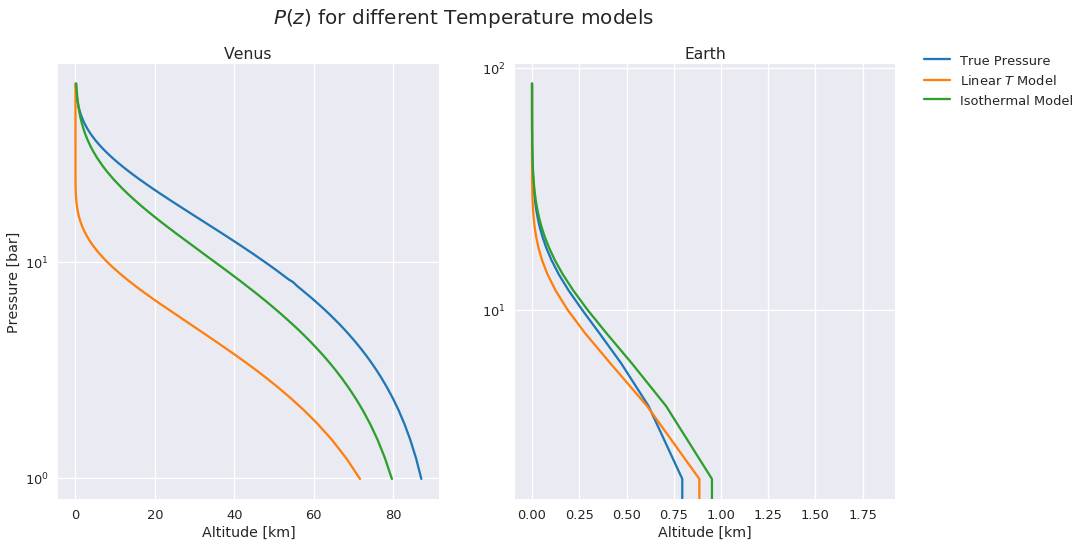

In [222]:
venus_p = venus_params[0]
earth_p = earth_params[0]
venus_mask = np.where(venus_p > 0.1*units.bar)
earth_mask = np.where(earth_p > 0.1*units.bar)

venus_z = venus_params[3]
earth_z = earth_params[3]

venus_lapse = -1.0*np.median(venus_params[5])
earth_lapse = -1.0*np.median(earth_params[5])

venus_mu = venus_params[-1]/(constants.N_A)
earth_mu = earth_params[-1]/(constants.N_A)

venus_t = venus_params[1]
earth_t = earth_params[1]


venus_exp = ((venus_mu*venus_surf_g/(venus_lapse*k_B)).to(units.dimensionless_unscaled)).value
venus_factor = ((1.0 - (venus_lapse*venus_z)/venus_t[-1]))
venus_factor[np.where(venus_factor < 0.0)] = 0.0
venus_p_model = venus_p[0]*(venus_factor**venus_exp)
venus_h = k_B*np.median(venus_t)/(venus_mu*venus_surf_g)
venus_isotherm = venus_p[0]*np.exp(-venus_z/venus_h)

earth_exp = ((earth_mu*earth_surf_g/(earth_lapse*k_B)).to(units.dimensionless_unscaled)).value
earth_factor = ((1.0 - (earth_lapse*earth_z)/earth_t[-1]))
earth_factor[np.where(earth_factor < 0.0)] = 0.0
earth_p_model = earth_p[0]*(earth_factor**earth_exp)
earth_h = k_B*np.median(earth_t)/(earth_mu*earth_surf_g)
earth_isotherm = earth_p[0]*np.exp(-earth_z/earth_h)


plt.figure(12, figsize=(15,8))
plt.subplot(121)
plt.plot(venus_p, venus_z, label = 'True Pressure')
plt.plot(venus_p_model, venus_z, label=r'Linear $T$ Model')
plt.plot(venus_isotherm, venus_z, label='Isothermal Model')
plt.title('Venus')
plt.xlabel('Altitude [km]')
plt.yscale('log')
plt.ylabel('Pressure [bar]')

plt.subplot(122)
plt.plot(earth_p, earth_z, label = 'True Pressure')
plt.plot(earth_p_model, earth_z, label=r'Linear $T$ Model')
plt.plot(earth_isotherm, earth_z, label='Isothermal Model')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.title('Earth')
plt.xlabel('Altitude [km]')
plt.yscale('log')

plt.suptitle(r'$P(z)$ for different Temperature models', fontsize=20)


$\textrm{ For both planets, the isothermal model works better, although for Earth all 3 models are fairly close to each other.}$

<font color='seagreen'>

### Q4: Below the Surface
+ Analytically integrate the equation of hydrostatic equilibrium to derive an expression for the pressure at the center of a planet with radius $R$ and mass $M$. Assume the density is constant with depth and ignore any contributions from an atmosphere. Recall that for a spherical object $g(R)$, the acceleration due to gravity at a radius $R$, can be written as
$$ g(R) = \frac{GM(R)}{R^2} $$
where $M(R)$ is the total mass enclosed within the radius $R$. 
+ Based on your expression, what is the pressure at the center of the Earth?


$\textbf{Answer:} \textrm{ Assuming a constant density, hydrostatic equilibrium gives}$

$\frac{dP}{dR} = - \rho g(R) = - \rho \frac{G M(R)}{R^2} = -\rho \frac{G \frac{4 \pi}{3}\rho R^3}{R^2} = - \frac{4 \rho^2 G \pi}{3} R$

$\implies \int_{P(R=0) = P_c}^{0} dP = - \frac{4 \rho^2 G \pi}{3} \int_{0}^{R_p} R dR \implies P_0 = \frac{4 \rho^2 G \pi}{3} \times \frac{R_{p}^{2}}{2}$

$\implies P_c = \frac{4 \rho^2 G \pi}{6} R_p^2$

$\textrm{For the Earth, this gives us $P_c = 1.726 \times 10^{11}$ Pa}$.

$\textrm{This is roughly half the true value but since the core density}$<br>$\textrm{should be significantly higher than the mean density, this is not an unreasonable difference.}$